# Standard Cuts Cross-section Analysis 




In [1]:
from sklearn.externals import joblib

In [2]:
run ../prep_ana.py

Welcome to JupyROOT 6.08/00
Loading plotting specs...
8 or 13 TeV:13TeV
unc_mc_process and scales as dictionaries
Load MC and Data?False
df = pd.concat([df_dy0, df_dy1, df_dy2, df_dy3, df_dy4, df_dy_m_10, df_ww, df_tt_l, df_tt_sl, df_zz_ln, df_wz_ln, df_wz_lq ])


In [3]:
%matplotlib inline

In [4]:
data_path = '../data_13TeV/out_Z'
data_path = '../data_13TeV_alpha'

In [5]:
columns = [ 'process', 'process_decay',
        'weight', 'lep1_Charge', 'lep2_Charge', 'lep_Type', 'numbExtraLep',
        'tot_npv', 'mll', 'numb_jets', 'metMod',
        'lep1_pt', 'lep2_pt', 'lep3_pt', 'dPhiLL',
        'jet1_pt', 'jet2_pt', 'HT', 'numb_BJet',
        'METProj_sin', 'met_over_sET','METProj_trk_sin', 'met_phi',
        'dPhiLLMET',  'mllMET', 'qT', 'recoil', 'dPhiLLJet', 'dPhiMETJet', 'gen_weight']

df_dy0 = rp.read_root(data_path+"/dyjetstoll_m-50_complete.root", columns=columns)
df_dy_m_10 = rp.read_root(data_path+"/dyjetstoll_m-10to50_complete.root", columns=columns)
df_ww = rp.read_root(data_path+"/ww_complete.root", columns=columns)
df_tt_l = rp.read_root(data_path+"/ttbar_leptonic_complete.root", columns=columns)
df_tt_sl = rp.read_root(data_path+"/ttbar_semileptonic_complete.root", columns=columns)
df_t_s = rp.read_root(data_path+"/t_s-_complete.root", columns=columns)
df_t_t = rp.read_root(data_path+"/t_t-_complete.root", columns=columns)
df_t_tw = rp.read_root(data_path+"/t_tw-_complete.root", columns=columns)
#df_tbar_s = rp.read_root(data_path+"/tbar_s-_complete.root", columns=columns)
df_tbar_t = rp.read_root(data_path+"/tbar_t-_complete.root", columns=columns)
df_tbar_tw = rp.read_root(data_path+"/tbar_tw-_complete.root", columns=columns)
df_zz_ln = rp.read_root(data_path+"/zzjetsto2l2nu_complete.root", columns=columns)
df_zz_lq = rp.read_root(data_path+"/zzjetsto2l2q_complete.root", columns=columns)
df_wz_lq = rp.read_root(data_path+"/wzjetsto2l2q_complete.root", columns=columns)
df_wz_ln = rp.read_root(data_path+"/wzjetsto3lnu_complete.root", columns=columns)
df_w1j = rp.read_root(data_path+"/w1jetstolnu_complete.root", columns=columns)
df_w2j = rp.read_root(data_path+"/w2jetstolnu_complete.root", columns=columns)
df_w3j = rp.read_root(data_path+"/w3jetstolnu_complete.root", columns=columns)
df_w4j = rp.read_root(data_path+"/w4jetstolnu_complete.root", columns=columns)
#df_h_ww = rp.read_root(data_path+"/glugluh_complete.root", columns=columns)
#df_wg = rp.read_root(data_path+"/wg_complete.root", columns=columns)

df = pd.concat([df_dy0, df_dy_m_10, df_tt_l, df_tt_sl, df_zz_ln, df_zz_lq, df_wz_lq, df_wz_ln, df_w1j, df_w2j, df_w3j, df_w4j, df_ww,
               df_tbar_tw, df_tbar_t,df_t_tw,  df_t_t, df_t_s])

Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class string read from file ../data_13TeV_alpha/dyjetstoll_m-50_complete.root
   has the same version (=2) as the active class but a different checksum.
   You should update the version to ClassDef(string,3).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::_Alloc_hider _M_dataplus; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   unsigned long _M_string_length; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::(anonymous) ; //


In [6]:
df["gen_weight"] = df.gen_weight.values/ np.abs(df.gen_weight.values)
df["weight"] = df.weight.values * df.gen_weight.values

In [7]:
df_da_b = rp.read_root(data_path+"/muon_2016B_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_c = rp.read_root(data_path+"/muon_2016C_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_d = rp.read_root(data_path+"/muon_2016D_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_e = rp.read_root(data_path+"/muon_2016E_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_f = rp.read_root(data_path+"/muon_2016F_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_g = rp.read_root(data_path+"/muon_2016G_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_h = rp.read_root(data_path+"/muon_2016H_complete.root", columns=columns+["runNum", "eventNumb"])

df_da = pd.concat([df_da_b, df_da_c, df_da_d, df_da_e, df_da_f, df_da_g, df_da_h])

In [8]:
pre_df = pre_cuts(df, diff_charge=False)
pre_df_da = pre_cuts(df_da, diff_charge=False)

In [9]:
#load random forest
random_forest = joblib.load("../RF/13TeV_June_fDY_fTT.jbl")

In [10]:
pred_fTT = random_forest["clf_fTT"].predict_proba(np.float32(pre_df[random_forest["features_fTT"]].values))
pre_df["pred_fTT_WW"] = pred_fTT[:,0]

pred_fDY = random_forest["clf_fDY"].predict_proba(np.float32(pre_df[random_forest["features_fDY"]].values))
pre_df["pred_fDY_WW"] = pred_fDY[:,0]

pred_fTT = random_forest["clf_fTT"].predict_proba(np.float32(pre_df_da[random_forest["features_fTT"]].values))
pre_df_da["pred_fTT_WW"] = pred_fTT[:,0]

pred_fDY = random_forest["clf_fDY"].predict_proba(np.float32(pre_df_da[random_forest["features_fDY"]].values))
pre_df_da["pred_fDY_WW"] = pred_fDY[:,0]

In [11]:
def rf_ana( df, flavor="both", random_forest=random_forest):
  
  rf_cuts = (df.pred_fTT_WW > .65) & (df.pred_fDY_WW > .972)
  same_cuts = (df.lep_Type < 0) & rf_cuts 
  diff_cuts =  (df.lep_Type > 0) & rf_cuts


  if flavor=="both": return pd.concat( [df[same_cuts], df[diff_cuts]] )
  elif flavor=="same": return df[same_cuts]
  elif flavor=="diff": return df[diff_cuts]

# Yields

In [12]:
df_yields = process_yields(rf_ana(pre_df), rf_ana(pre_df_da))
save_df_to_html(df_yields, "yields_rf_may.html")

WW 1471.18428908 5160.84394477
DY 163.747523443 290.991014542
Top 259.922551014 763.211293004
WZ 48.2502072585 123.752251406
ZZ 51.6887759263 5.14002781271
WG 66.6649473591 157.98877141
Higgs 31.9559757832 103.344389452
{'Diff Flavor': [5010, 151, 5161, 291, 763, 124, 5, 158, 103, 597, 7202, 7367], 'Same Flavor': [1404, 68, 1471, 164, 260, 48, 52, 67, 32, 88, 2181, 2266], 'Process': ['WW', 'GluGluToWWTo4L', 'WW', 'DY', 'Top', 'WZ', 'ZZ', 'WG(*)', 'Higgs', 'WJ', 'Total', 'DATA']}


In [60]:
process_yields(rf_ana(pre_df), rf_ana(pre_df_da))


,Diff Flavor,Process,Same Flavor
0,12953,WW,1414
1,12953,WW,1414
2,1165,DY,383
3,3694,Top,569
4,348,WZ,56
5,4,ZZ,18
6,2560,WJ,246
7,20725,Total,2685
8,23752,DATA,3258


WW 1413.68286633 12952.7330069
DY 382.584375066 1165.47438428
Top 568.913616068 3693.87762024
WZ 55.8501351866 347.98135142
ZZ 18.0243570131 4.20536738628
{'Diff Flavor': [12953, 12953, 1165, 3694, 348, 4, 2560, 20725, 23752], 'Same Flavor': [1414, 1414, 383, 569, 56, 18, 246, 2685, 3258], 'Process': ['WW', 'WW', 'DY', 'Top', 'WZ', 'ZZ', 'WJ', 'Total', 'DATA']}


# Plots

(<matplotlib.figure.Figure at 0x7f0671540690>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f06713ec350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0670c8f890>], dtype=object))

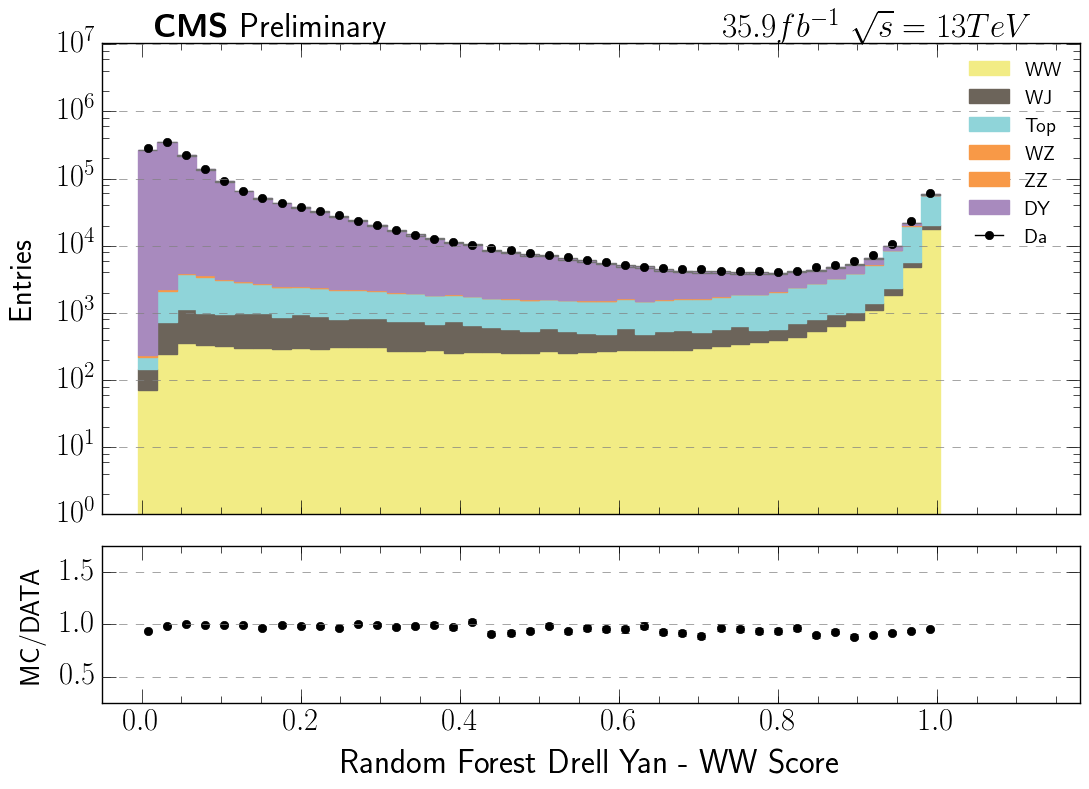

In [17]:
feature = "pred_fDY_WW"
bins_mc = bin_df( pre_df[(pre_df.lep1_Charge != pre_df.lep2_Charge) & (pre_df.lep1_pt > 25) & (pre_df.lep2_pt > 25)], feature, range=(-0.1, 1.1))
bins_data = bin_df( pre_df_da[(pre_df_da.lep1_Charge != pre_df_da.lep2_Charge) & (pre_df_da.lep1_pt > 25) & (pre_df_da.lep2_pt > 25)], feature, range=(-0.1, 1.1))

full_plot(bins_mc, bins_data, title="Random Forest Drell Yan - WW Score", color="color_1", x_range=(-0.05, 1.18), )#logy=False, y_range=(0,20000))

(<matplotlib.figure.Figure at 0x7f0670c3ea50>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0670b941d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f06701f57d0>], dtype=object))

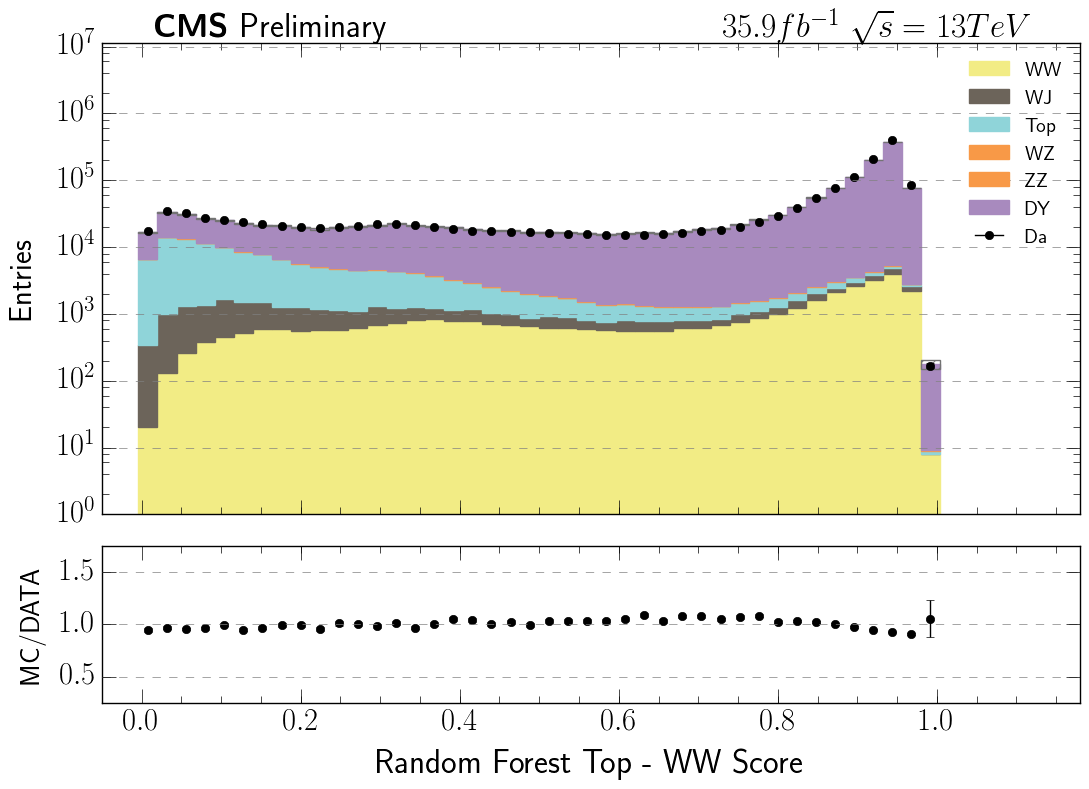

In [18]:
feature = "pred_fTT_WW"
bins_mc = bin_df( pre_df[(pre_df.lep1_Charge != pre_df.lep2_Charge) & (pre_df.lep1_pt > 25) & (pre_df.lep2_pt > 25)], feature, range=(-0.1, 1.1))
bins_data = bin_df( pre_df_da[(pre_df_da.lep1_Charge != pre_df_da.lep2_Charge) & (pre_df_da.lep1_pt > 25) & (pre_df_da.lep2_pt > 25)], feature, range=(-0.1, 1.1))

full_plot(bins_mc, bins_data, title="Random Forest Top - WW Score", color="color_1", x_range=(-0.05, 1.18), )#logy=False, y_range=(0,20000))

(<matplotlib.figure.Figure at 0x7f1c168c73d0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c149c6690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c140bec50>], dtype=object))

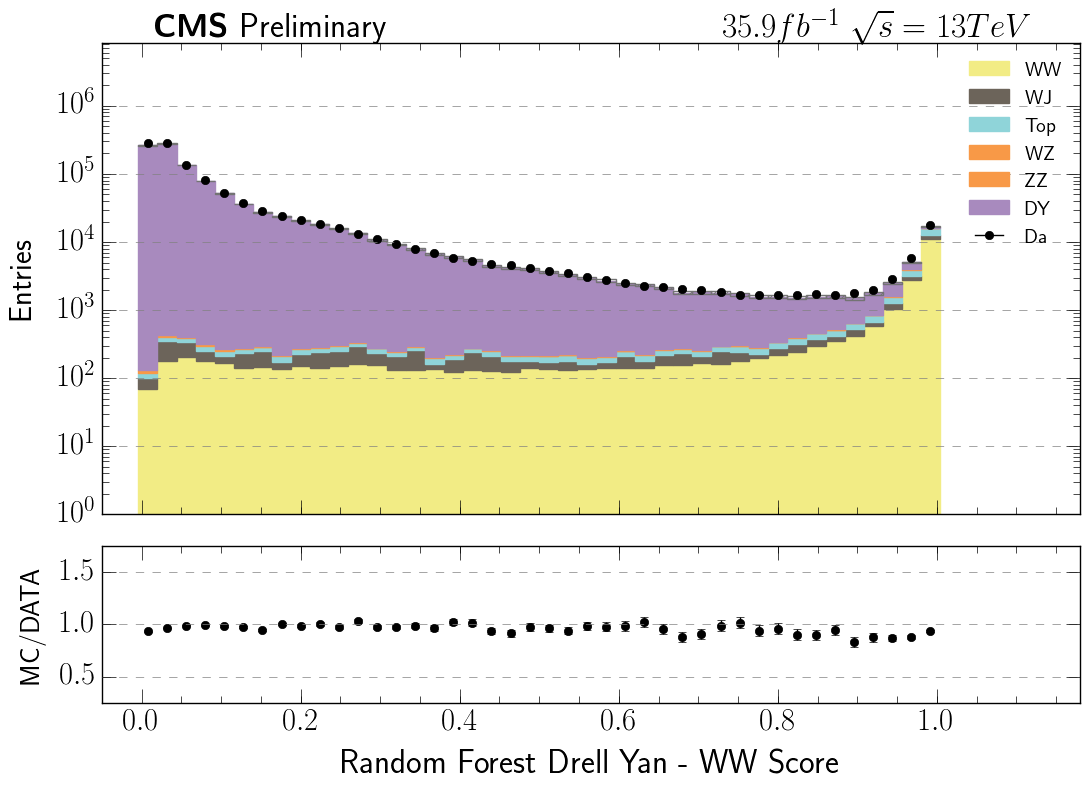

In [15]:
feature = "pred_fDY_WW"
bins_mc = bin_df( pre_df[(pre_df.lep1_Charge != pre_df.lep2_Charge) & (pre_df.lep1_pt > 25) & (pre_df.lep2_pt > 25) & (pre_df.pred_fTT_WW > .65)], feature, range=(-0.1, 1.1))
bins_data = bin_df( pre_df_da[(pre_df_da.lep1_Charge != pre_df_da.lep2_Charge) & (pre_df_da.lep1_pt > 25) & (pre_df_da.lep2_pt > 25) & (pre_df_da.pred_fTT_WW > .65)], feature, range=(-0.1, 1.1))

full_plot(bins_mc, bins_data, title="Random Forest Drell Yan - WW Score", color="color_1", x_range=(-0.05, 1.18), )#logy=False, y_range=(0,20000))

(<matplotlib.figure.Figure at 0x7f1c16c34990>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c13f84410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c125b8f90>], dtype=object))

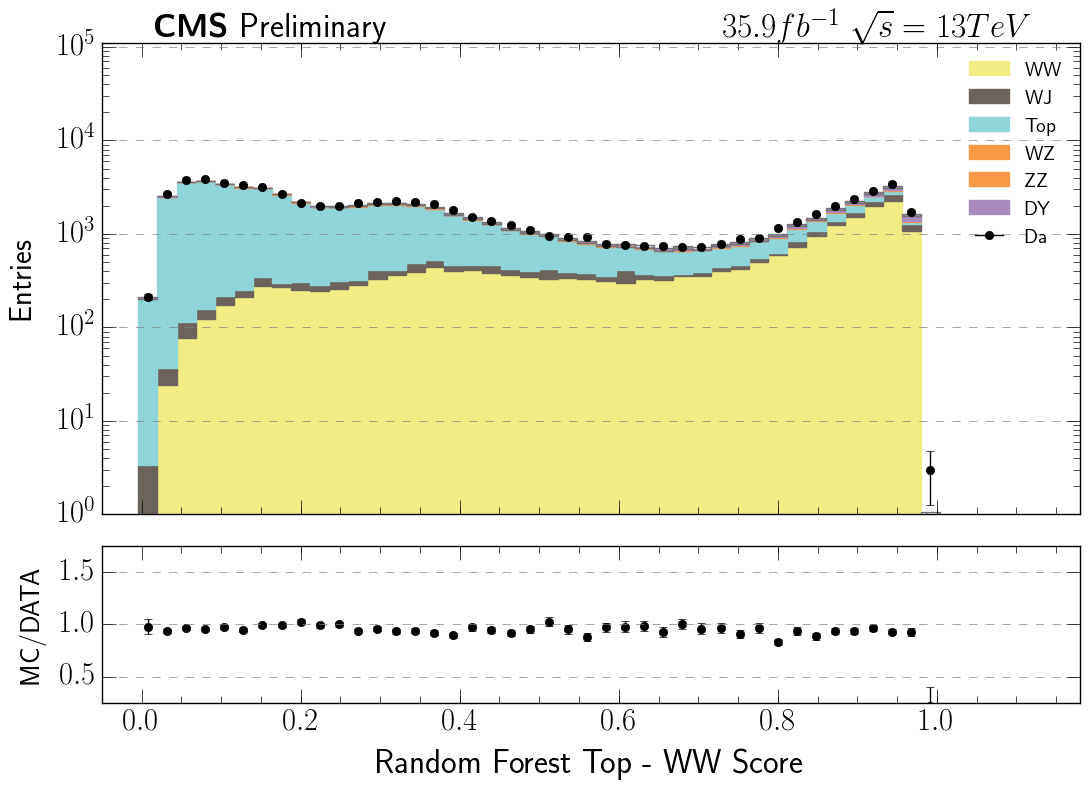

In [16]:
feature = "pred_fTT_WW"
bins_mc = bin_df( pre_df[(pre_df.lep1_Charge != pre_df.lep2_Charge) & (pre_df.lep1_pt > 25) & (pre_df.lep2_pt > 25) & (pre_df.pred_fDY_WW > .97)], feature, range=(-0.1, 1.1))
bins_data = bin_df( pre_df_da[(pre_df_da.lep1_Charge != pre_df_da.lep2_Charge) & (pre_df_da.lep1_pt > 25) & (pre_df_da.lep2_pt > 25) & (pre_df_da.pred_fDY_WW > .97)], feature, range=(-0.1, 1.1))

full_plot(bins_mc, bins_data, title="Random Forest Top - WW Score", color="color_1", x_range=(-0.05, 1.18), )#logy=False, y_range=(0,20000))

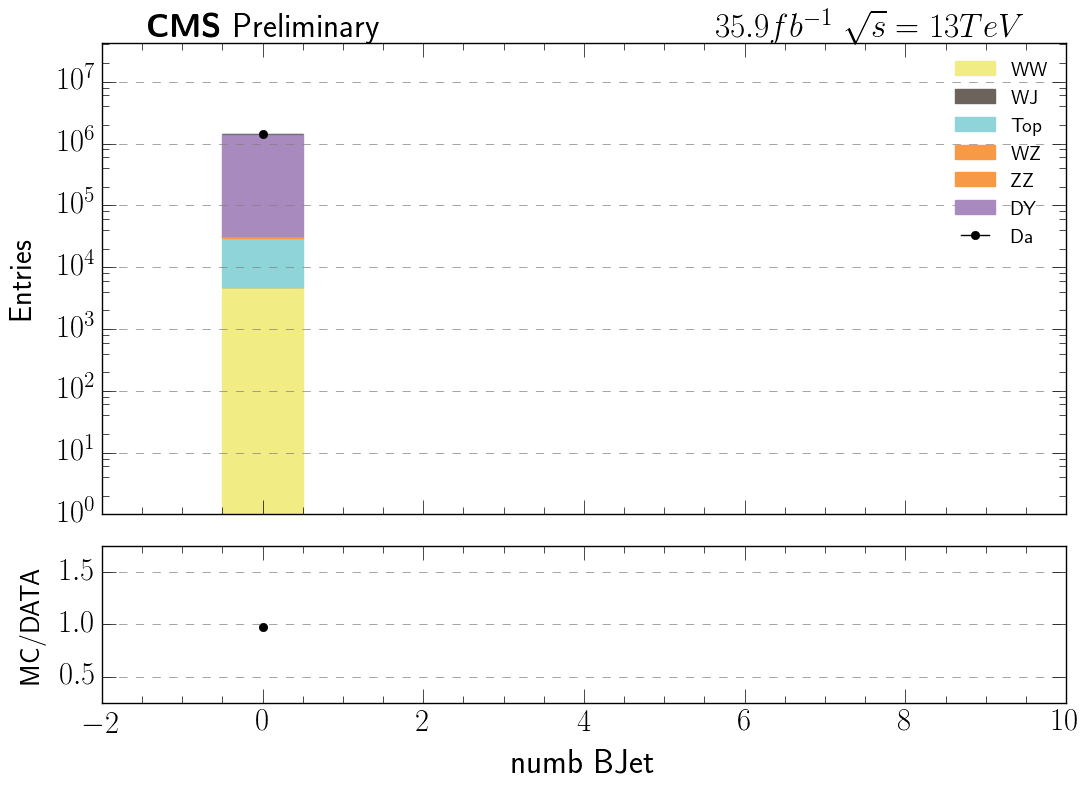

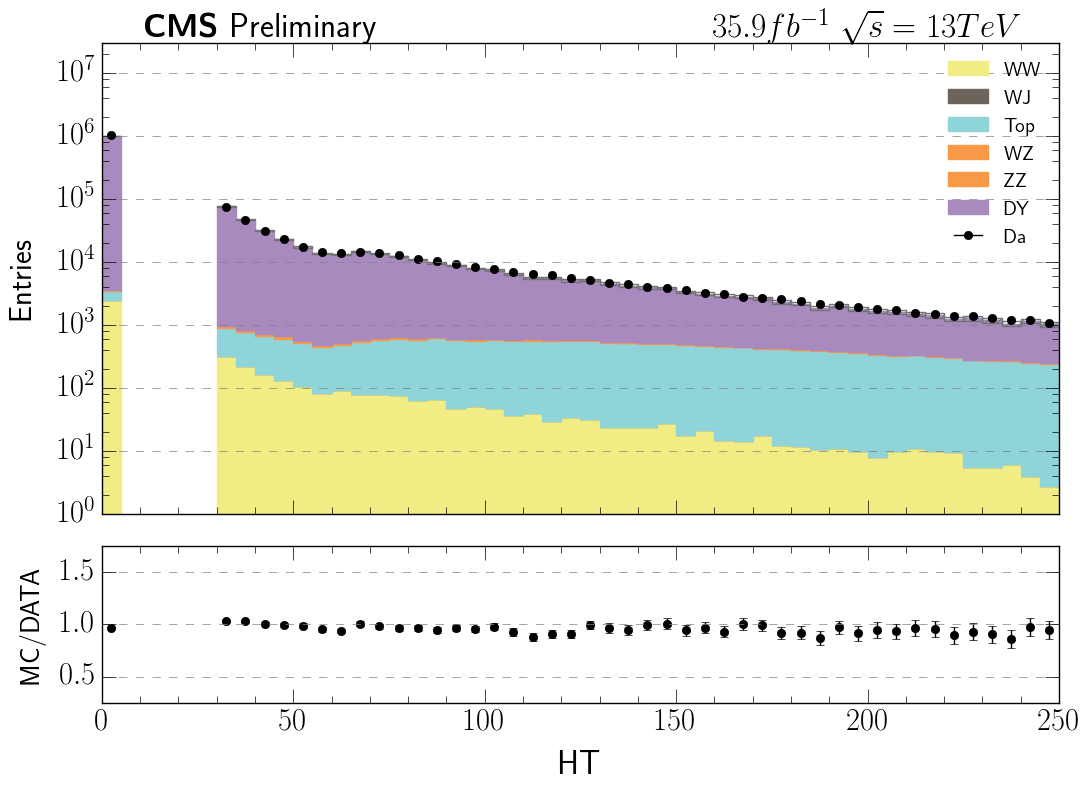

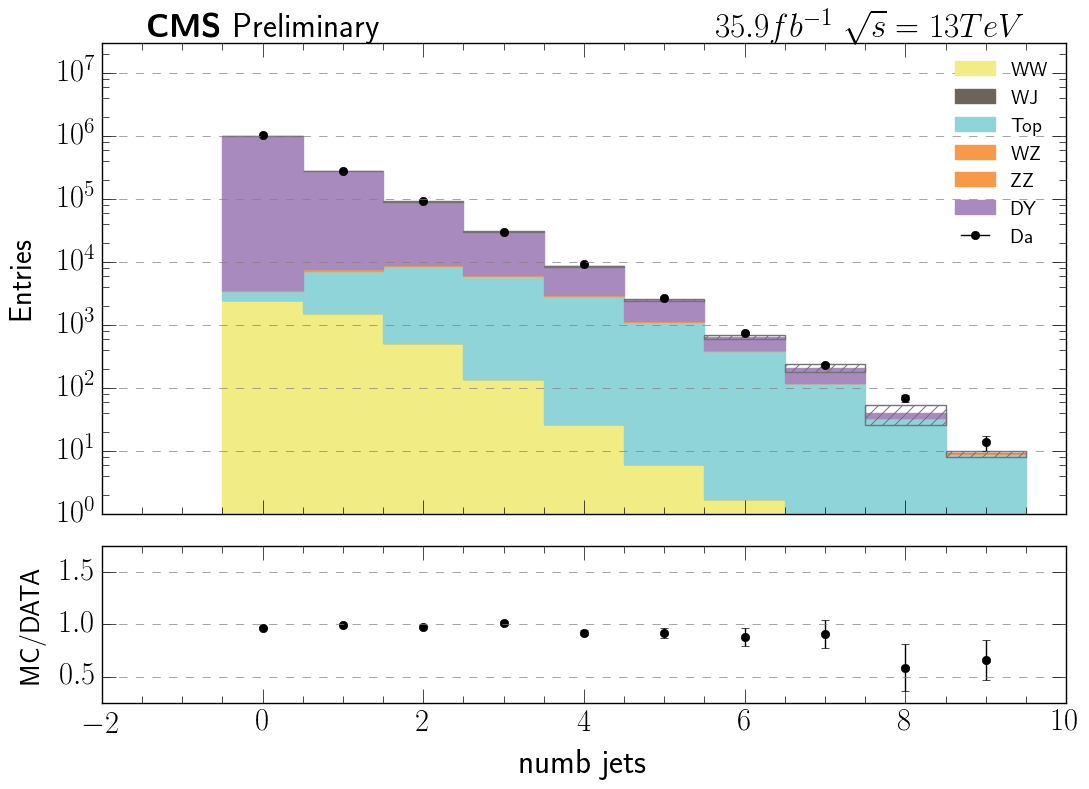

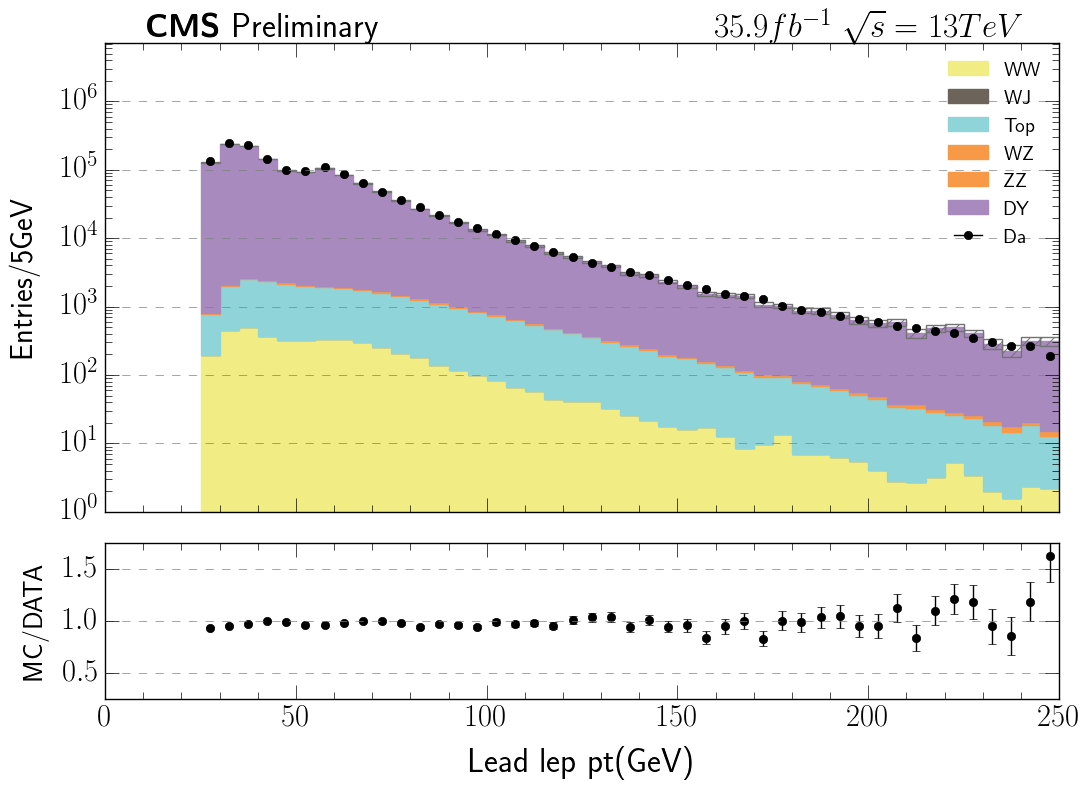

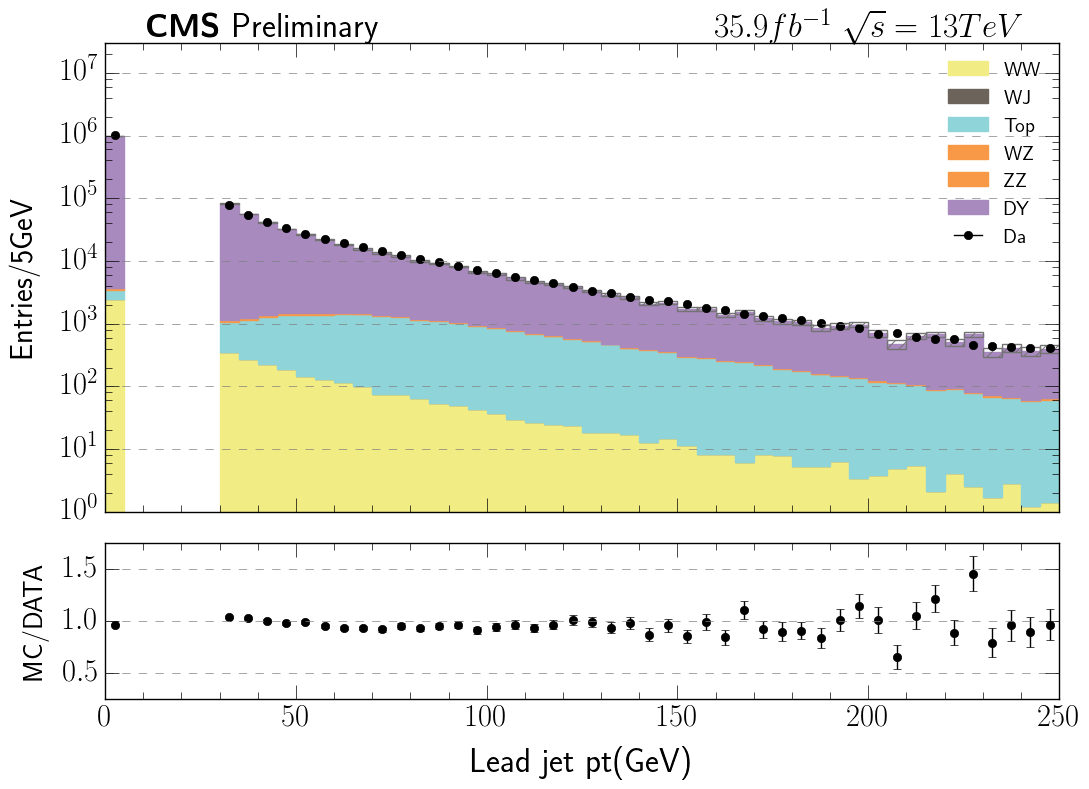

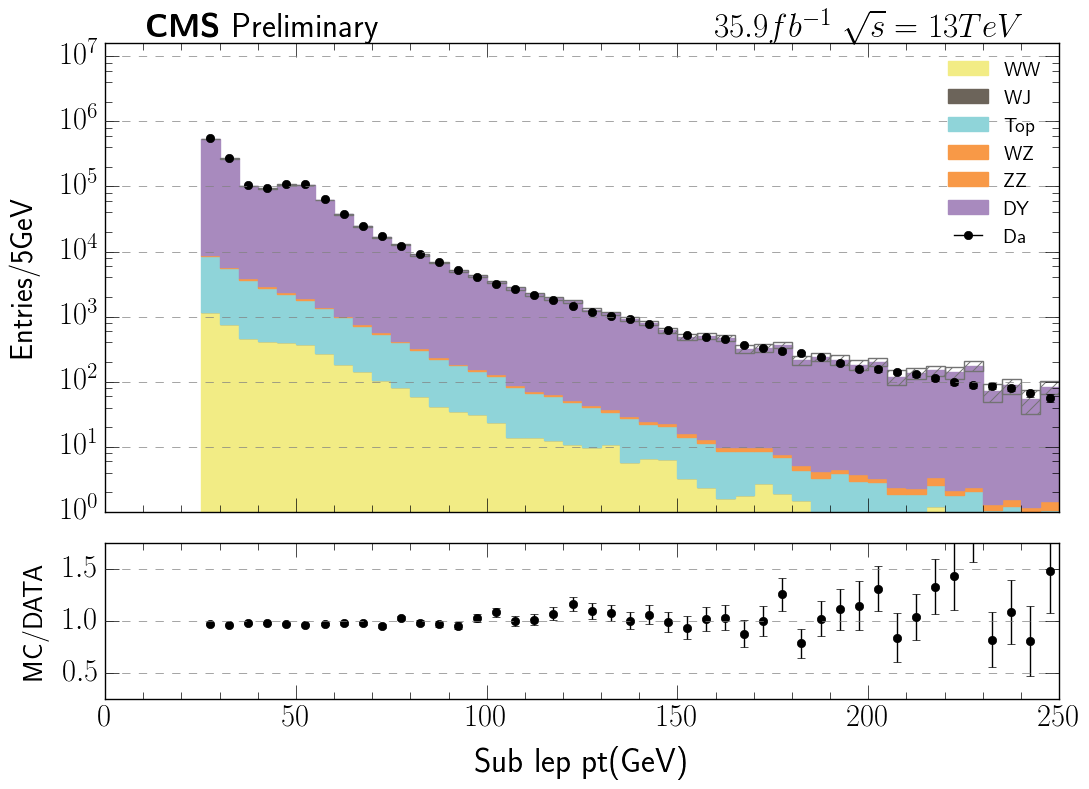

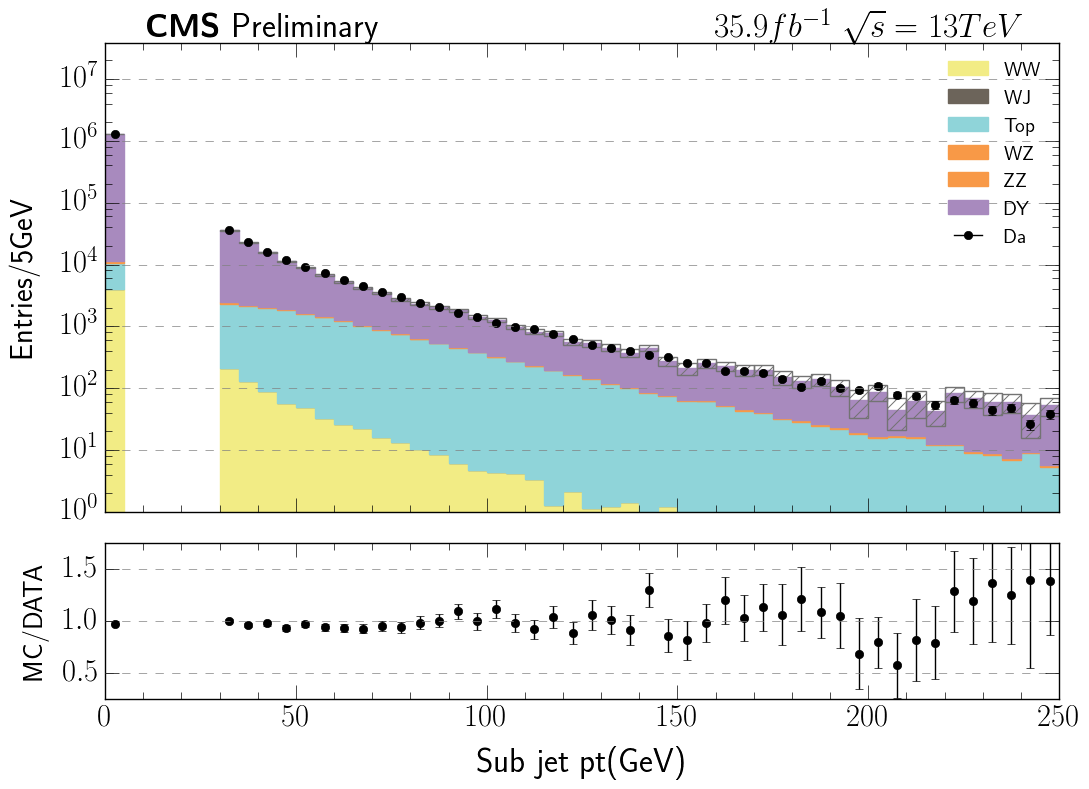

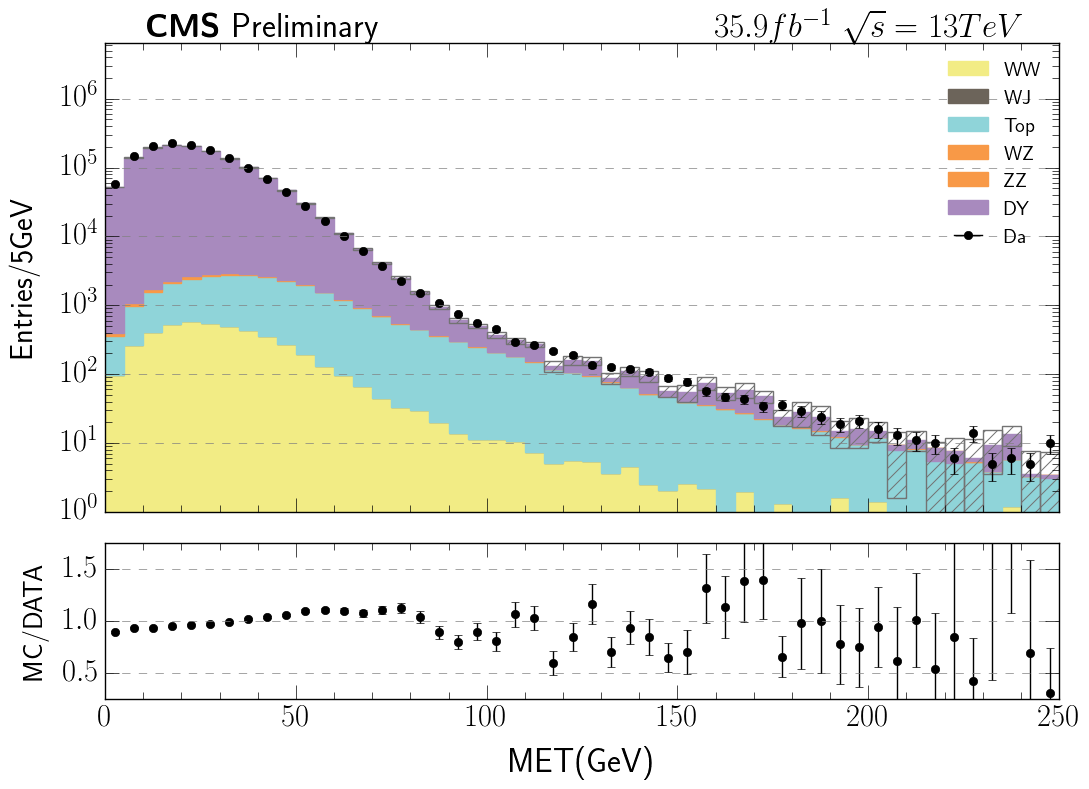

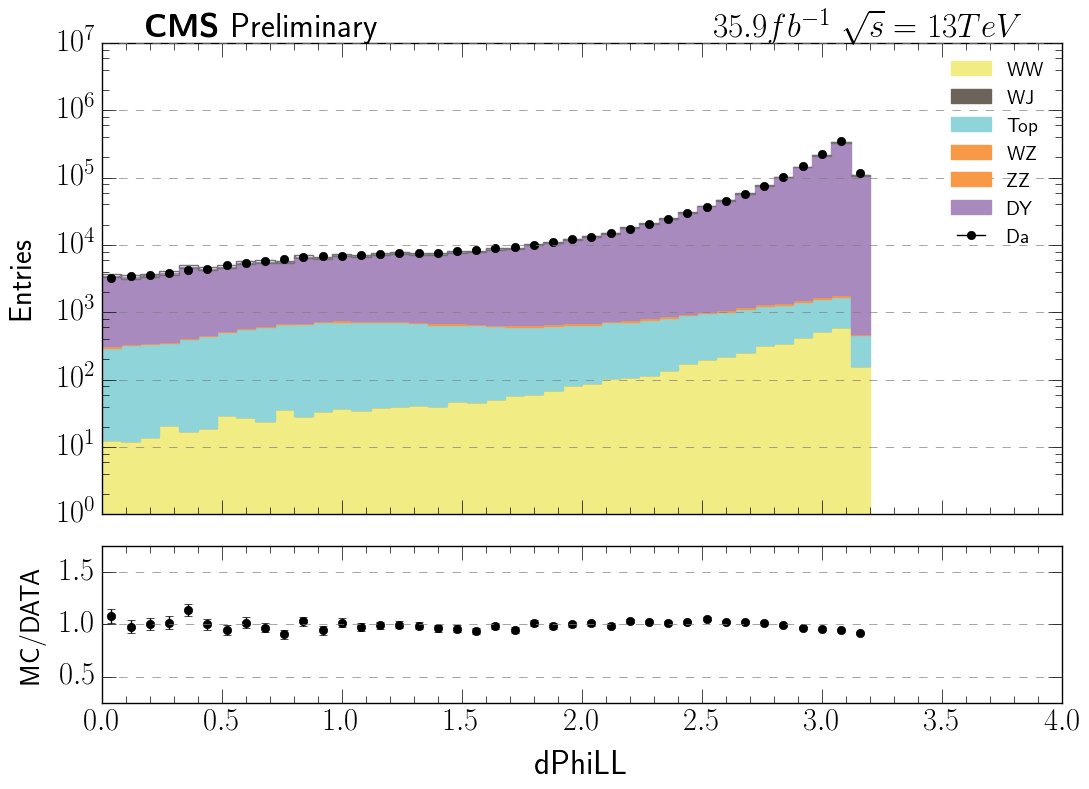

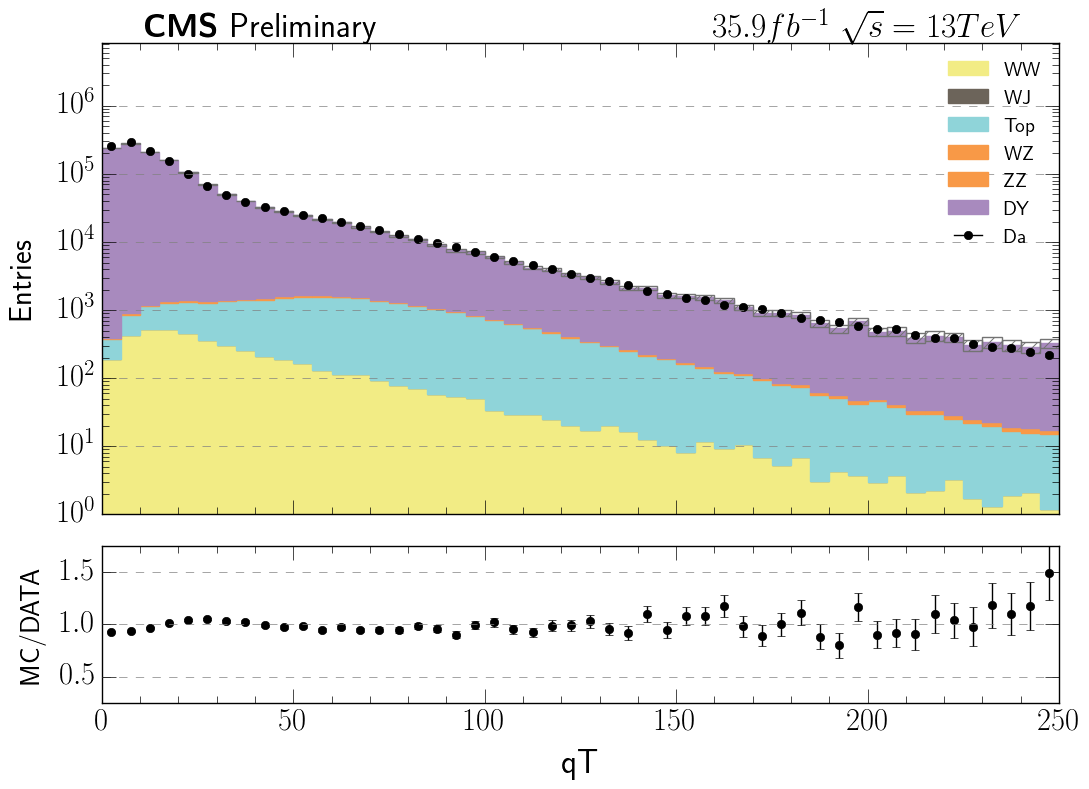

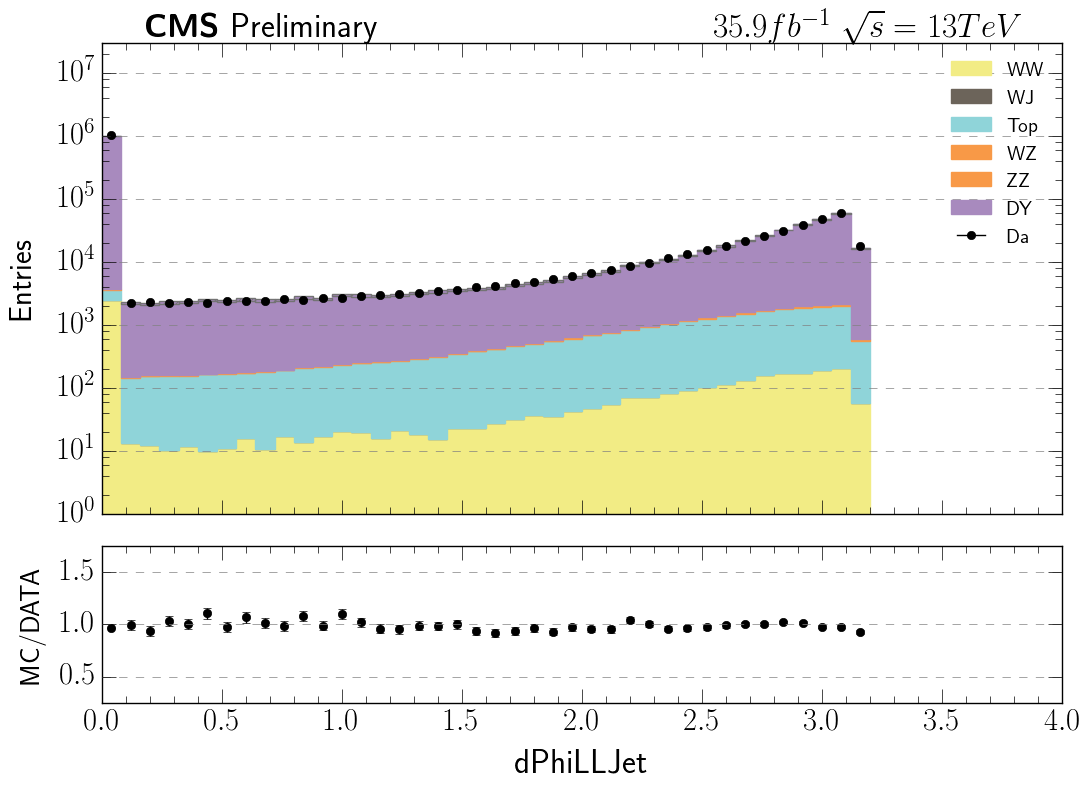

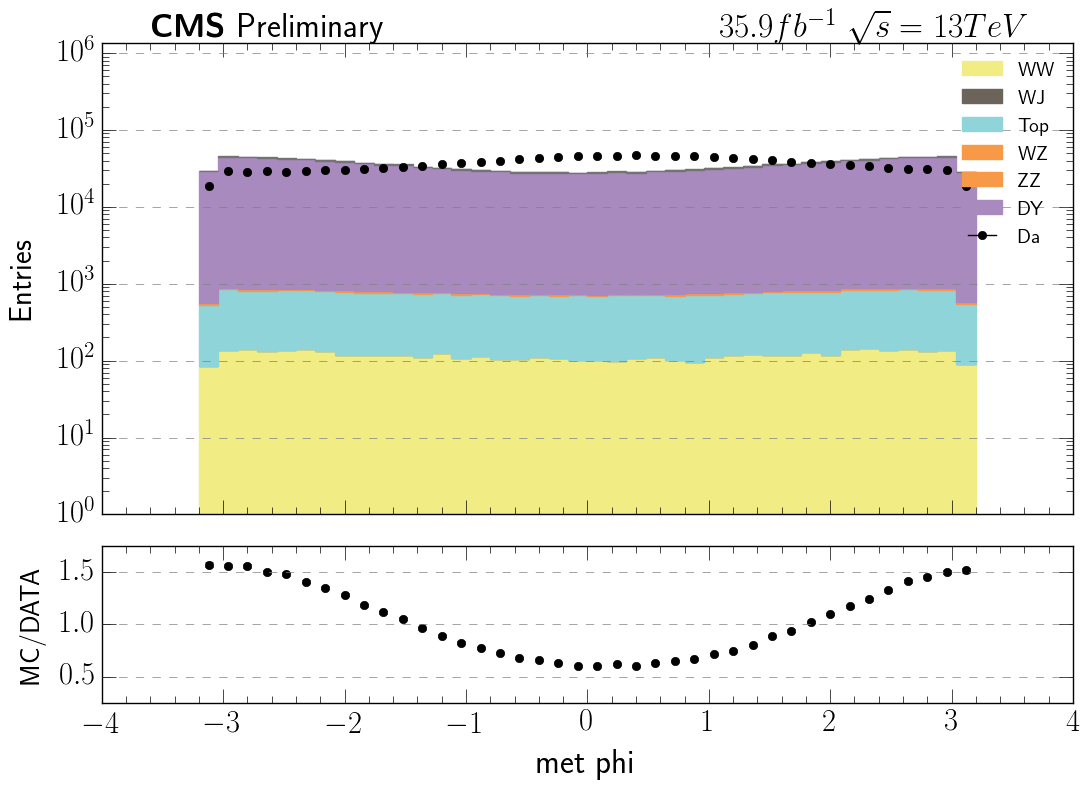

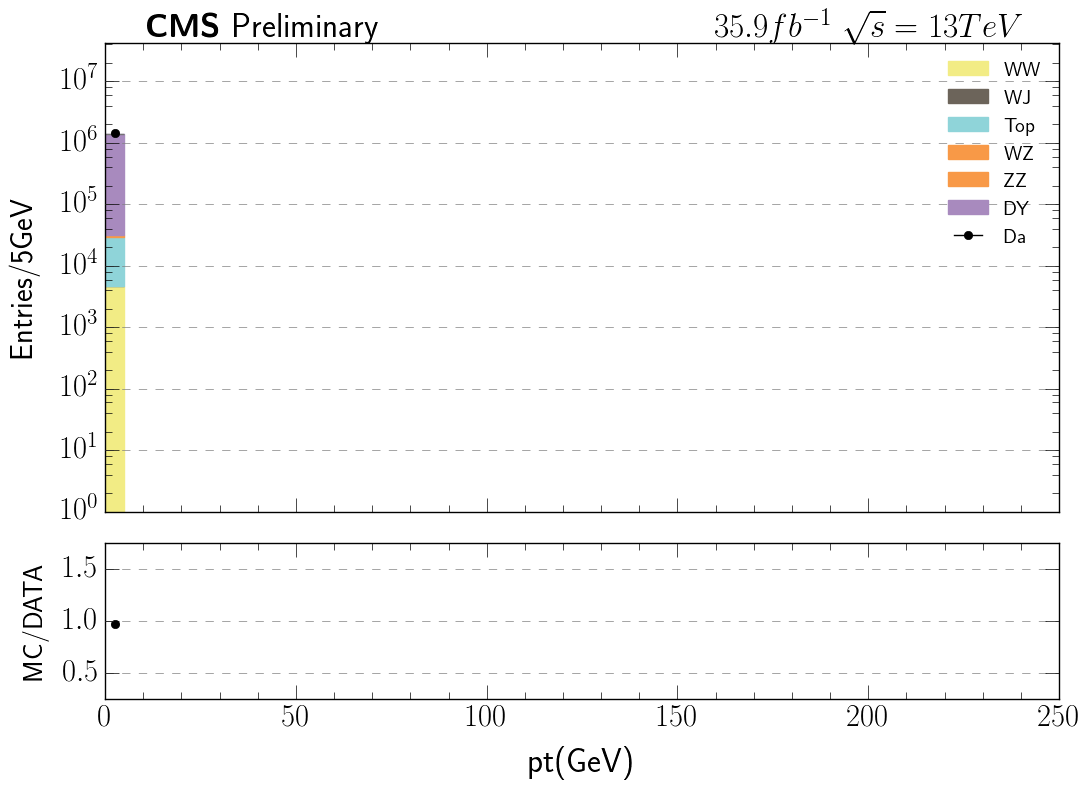

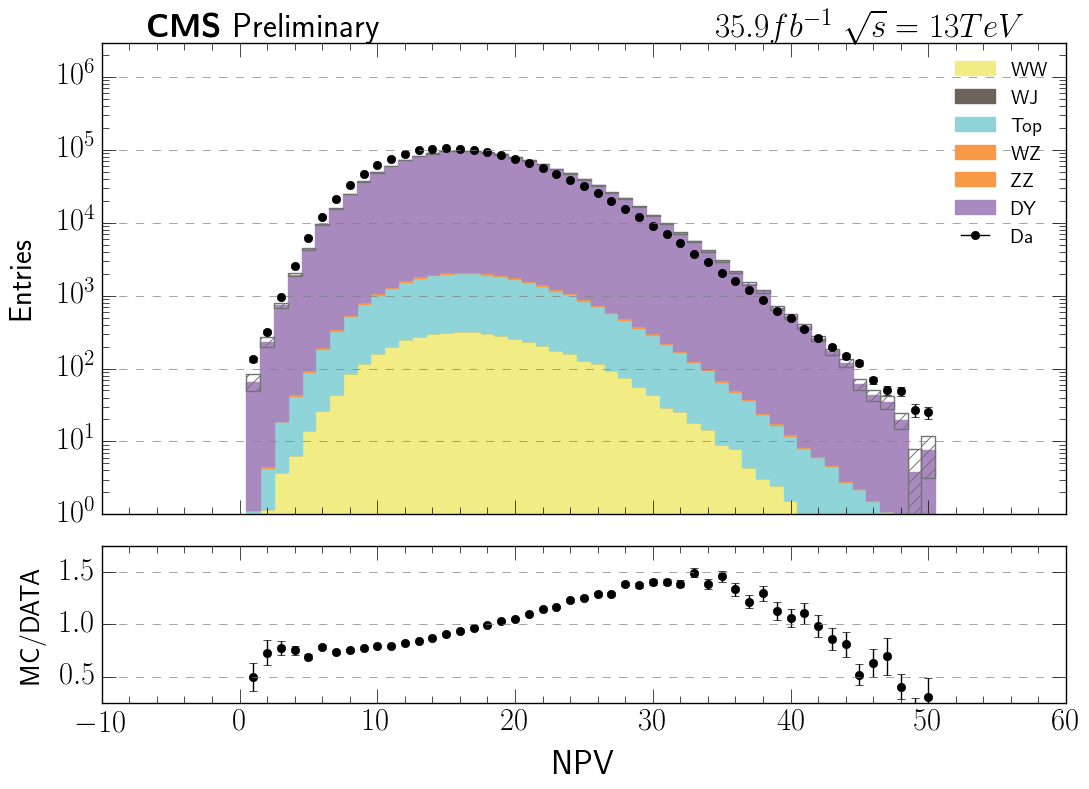

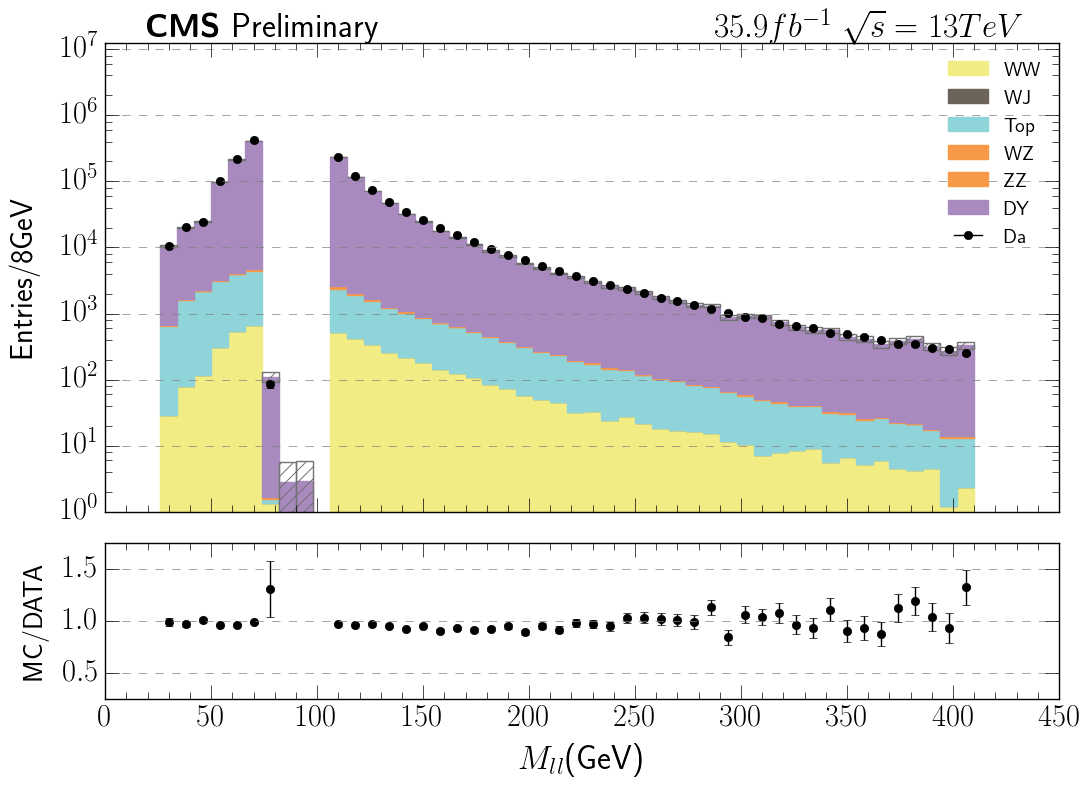

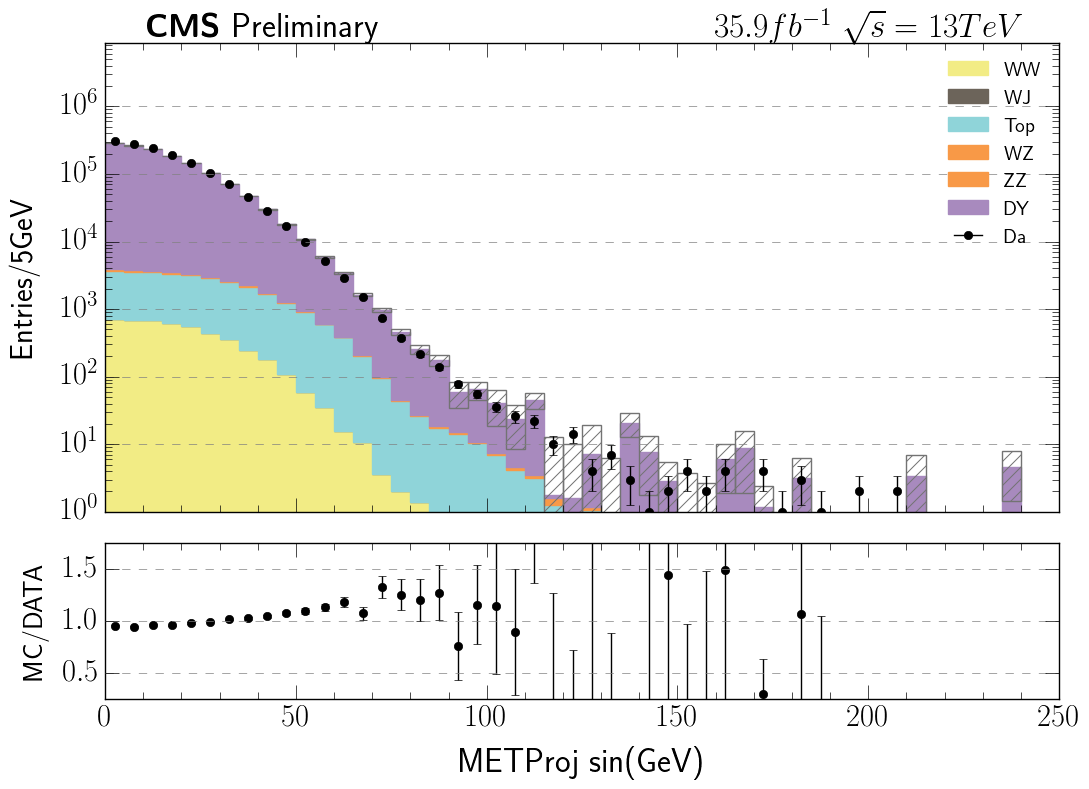

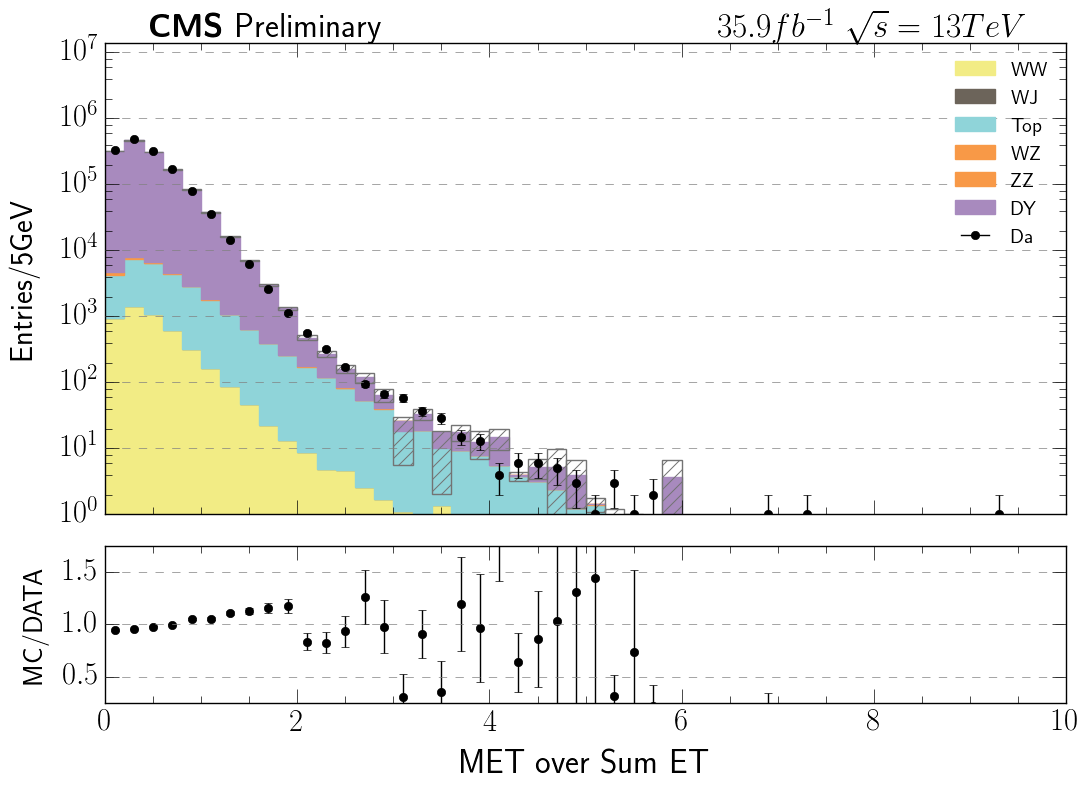

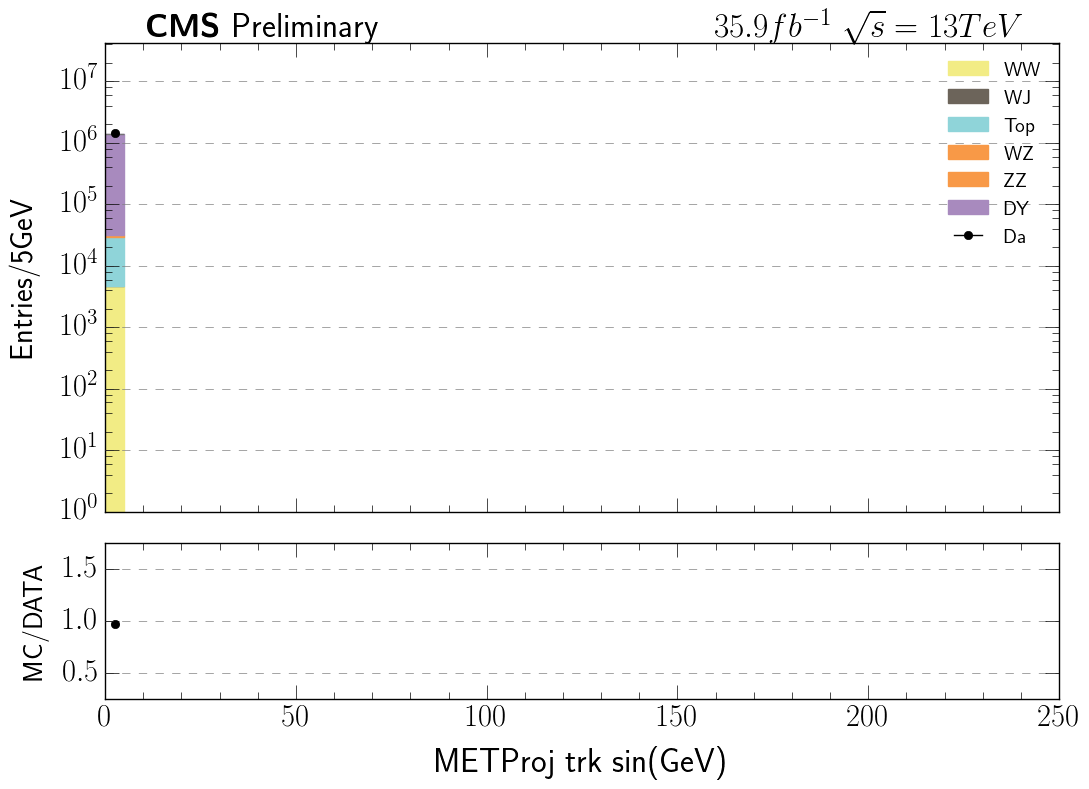

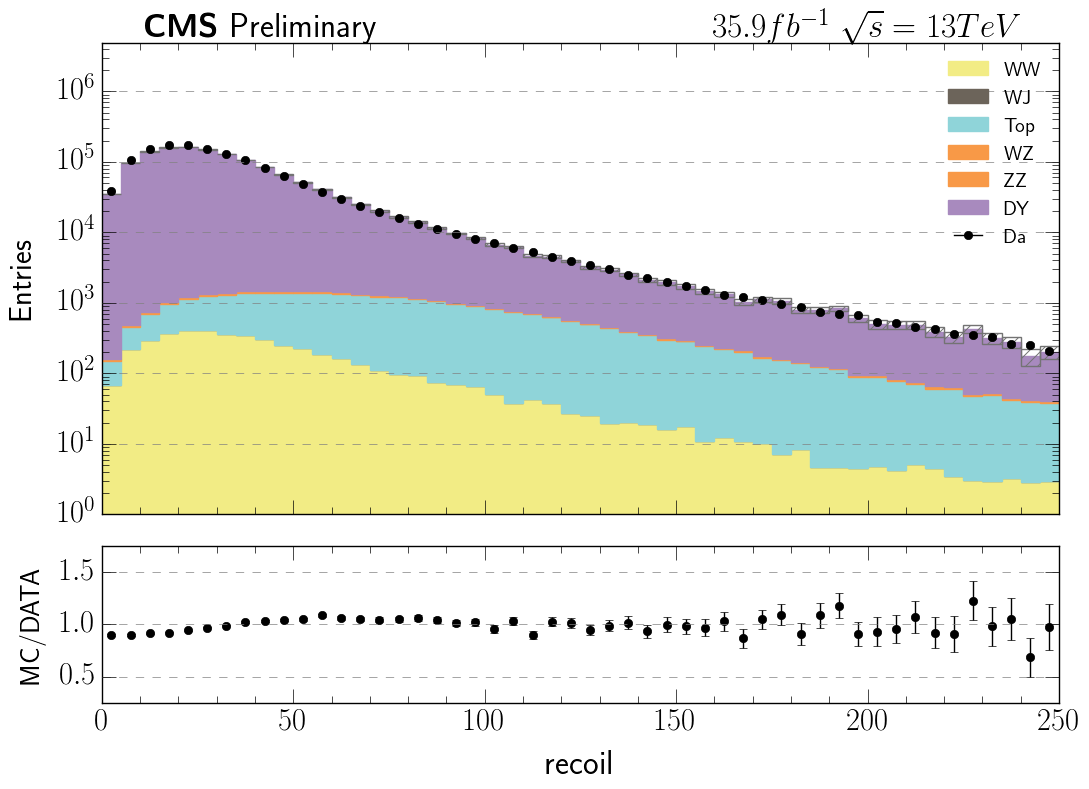

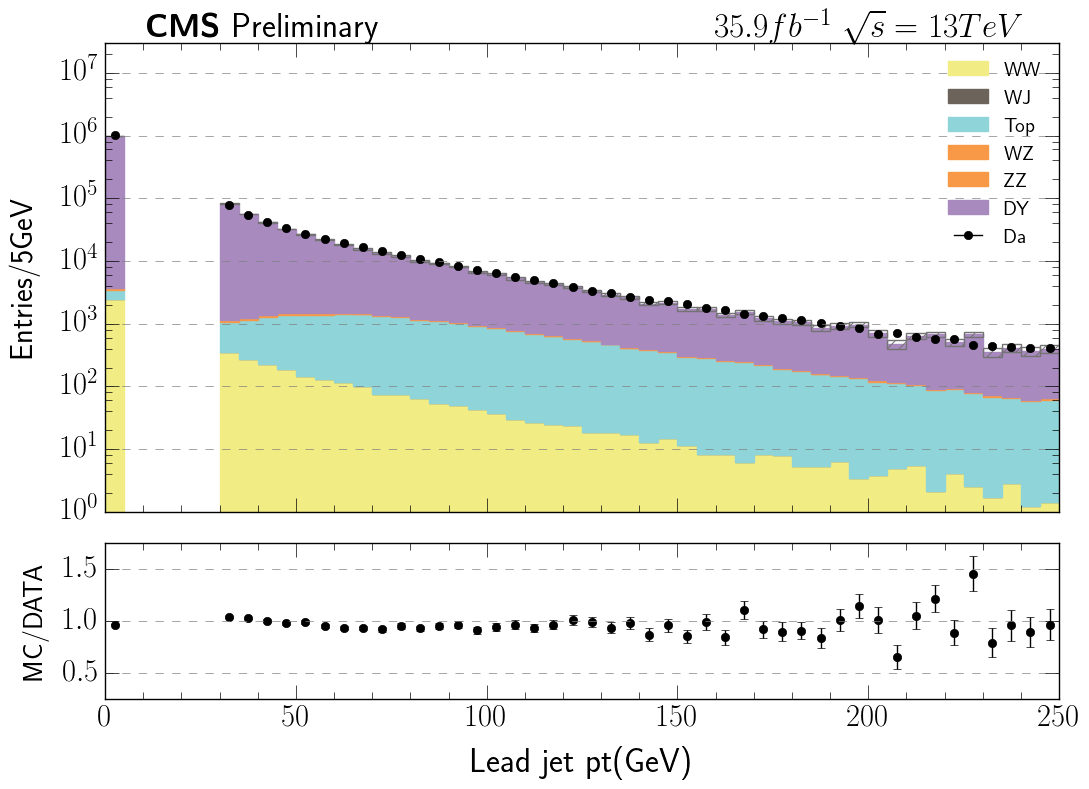

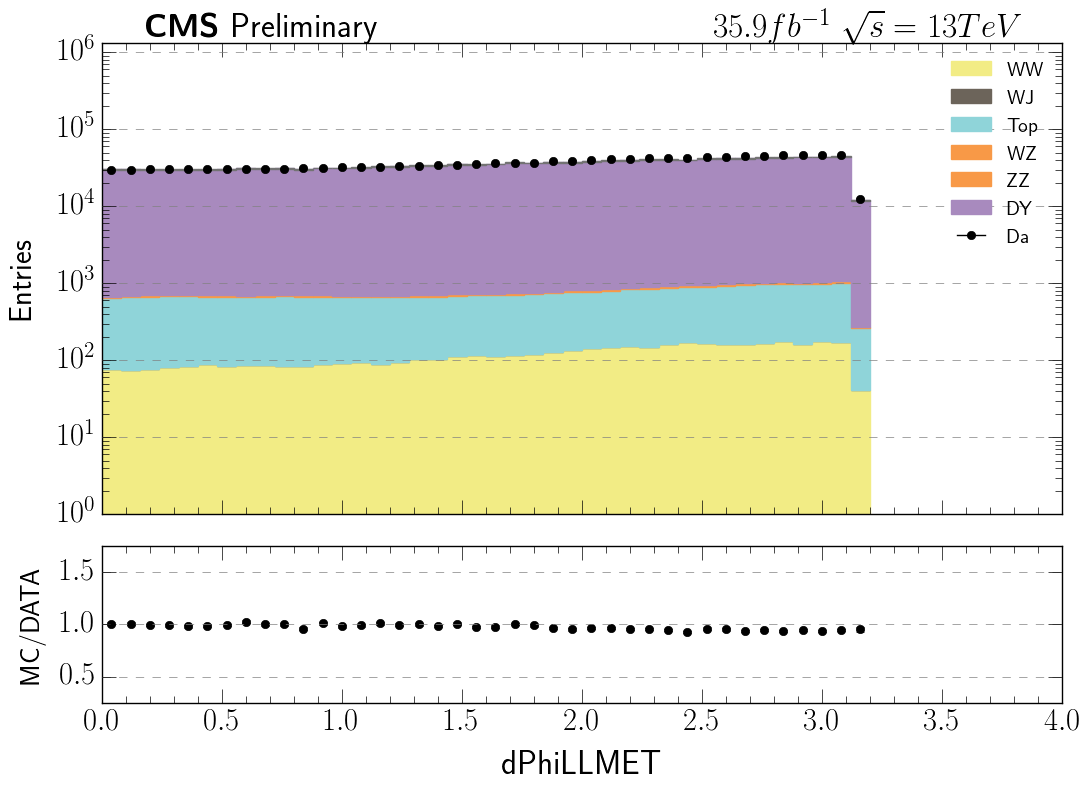

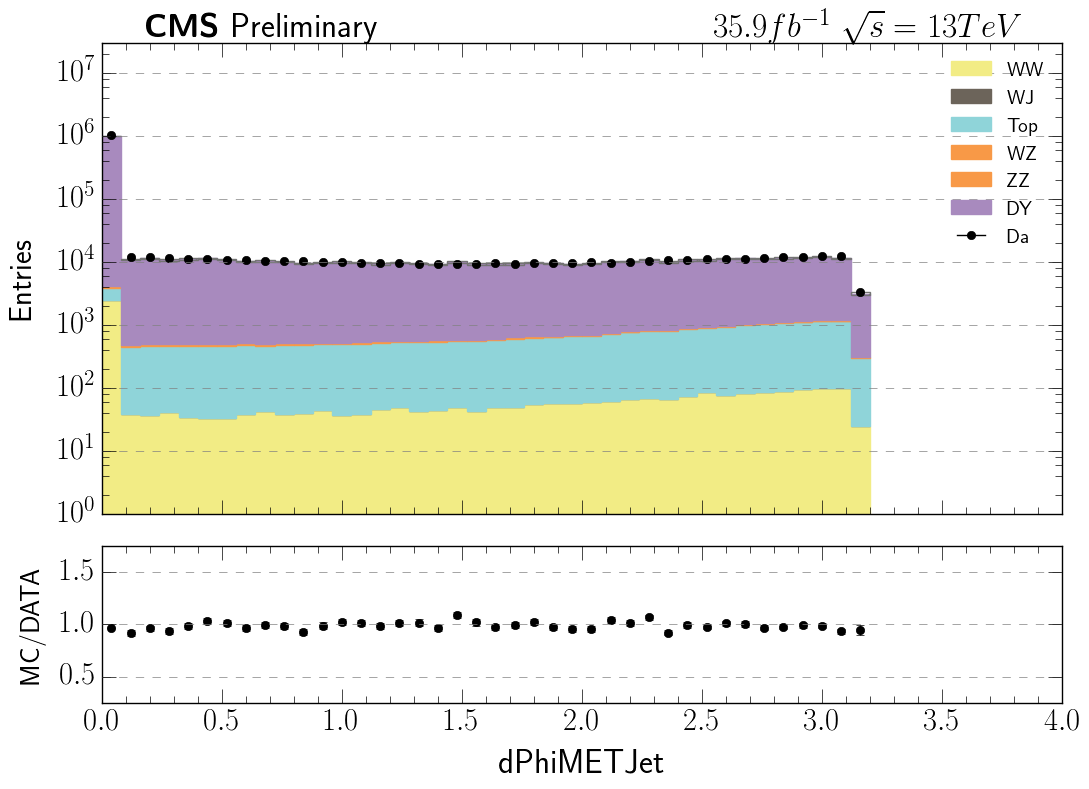

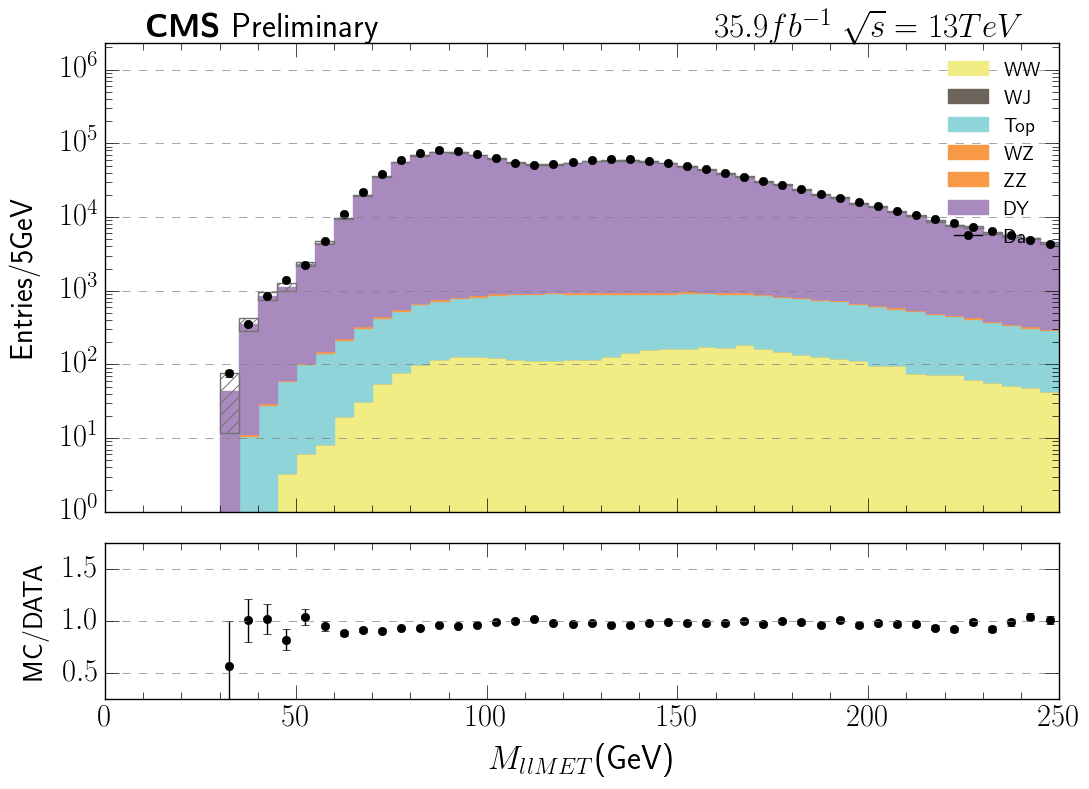

In [20]:
min_ = .4
max_ = 1.
create_kinematic_hist(pre_df[(pre_df.lep1_Charge != pre_df.lep2_Charge) & (pre_df.pred_fDY_WW < min_) & (pre_df.pred_fTT_WW < max_)& (pre_df.lep1_pt > 25) & (pre_df.lep2_pt > 25)],
                      pre_df_da[(pre_df_da.lep1_Charge != pre_df_da.lep2_Charge) & (pre_df_da.pred_fDY_WW < min_) & (pre_df_da.pred_fTT_WW < max_) & (pre_df_da.lep1_pt > 25) & (pre_df_da.lep2_pt > 25)],
                      prefix="13TeV/rf_plots/cuts_rf_DY")

In [ ]:
create_kinematic_hist(rf_ana(pre_df, flavor="same"), rf_ana(pre_df_da, flavor="same"), prefix="8TeV/rf_based/cuts_rf_same")

# Cross section calc

In [12]:
def calc_cross_stuff(df_mc, df_data, flavor="both", ):
    lumi = 35.9e3
    eff  = df_ww.shape[0]/1998956.#this had to be changed previously
    Br   = (3*.108)**2. 
    
    df_mc_c = df_mc[df_mc.lep1_Charge != df_mc.lep2_Charge]
    df_data_c = df_data[df_data.lep1_Charge != df_data.lep2_Charge]
    
    df_mc_c_s = df_mc[df_mc.lep1_Charge == df_mc.lep2_Charge]
    df_data_c_s = df_data[df_data.lep1_Charge == df_data.lep2_Charge]
    
    N_mc = sum([ rf_ana(df_mc_c[df_mc_c.process_decay == process], flavor=flavor).weight.values.sum()*scales[process] for process in scales.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu', 'GluGluToWWTo4L'] ])
    N_Wjets = rf_ana(df_data_c_s, flavor=flavor).shape[0] -  np.array([ rf_ana(df_mc_c_s[(df_mc_c_s.process_decay == process) ], flavor=flavor).weight.values.sum()*scales[process] for process in scales.keys() if process not in [ 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu'] ]).sum()
    N_mc += abs(N_Wjets)
    
    N_data = rf_ana(df_data_c, flavor=flavor).shape[0]
    
    N_ww_select = rf_ana(df_mc_c[df_mc_c.process_decay == "WW"], flavor=flavor).weight.values.sum()*scales["WW"] #+\
                #rf_ana(df_mc_c[df_mc_c.process_decay == "GluGluToWWTo4L"], flavor=flavor).weight.values.sum()*scales["GluGluToWWTo4L"]
    N_ww_tot = df_ww[df_ww.process_decay == "WW"].weight.values.sum()*scales["WW"] #+\
                #df_ww[df_ww.process_decay == "GluGluToWWTo4L"].weight.values.sum()*scales["GluGluToWWTo4L"]

    ratio_s_t = N_ww_select / N_ww_tot

    return {"lumi": lumi, "eff": eff, "Br": Br, "N_mc": N_mc, "N_data": N_data, "ratio_s_t": ratio_s_t, "N_ww_select":N_ww_select, "N_Wjets": N_Wjets}

In [18]:
def stat_unc_calc(df_mc, df_data, flavor="both", fiducial=False, **kwargs):
    if kwargs:
        var = kwargs
    else:
        var = calc_cross_stuff(df_mc, df_data, flavor)
    lumi = var["lumi"]
    eff = var["eff"]
    Br = var["Br"]
    N_mc = var["N_mc"]
    N_data = var["N_data"]
    ratio_s_t = var["ratio_s_t"]
    N_ww_select = var["N_ww_select"]
    N_Wjets = var["N_Wjets"]
    
    cuts_mc = {process: rf_ana(df_mc[(df_mc.process_decay == process) & (df_mc.lep1_Charge != df_mc.lep2_Charge)], flavor) for process in scales.keys()} 
    process_stat_unc = [ (cuts_mc[process].weight.values * cuts_mc[process].weight.values).sum()  * scales[process]**2 for process in cuts_mc.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu']] 
    
    WW_stat_unc = (cuts_mc["WW"].weight.values * cuts_mc["WW"].weight.values).sum() * scales["WW"]**2. * ratio_s_t**2. / N_ww_select**2.
    
    #print "Process stat", process_stat_unc
    #print "WW stat",WW_stat_unc
    if fiducial == False:
        return 1. / (lumi * eff * Br * ratio_s_t) * ( N_data + sum(process_stat_unc) + WW_stat_unc + N_Wjets)**.5
    else:
        return 1. / (lumi * eff ) * ( N_data + sum(process_stat_unc) + N_Wjets)**.5

In [62]:
def sys_unc_calc(df_mc, df_data, flavor="both", fiducial=False, **kwargs):
    if kwargs:
        var = kwargs
    else:
        var = calc_cross_stuff(df_mc, df_data, flavor)
    lumi = var["lumi"]
    eff = var["eff"]
    Br = var["Br"]
    N_mc = var["N_mc"]
    N_data = var["N_data"]
    ratio_s_t = var["ratio_s_t"]
    N_ww_select = var["N_ww_select"]
    N_Wjets = var["N_Wjets"]
    
    cuts_mc = {process: rf_ana(df_mc[(df_mc.process_decay == process) & (df_mc.lep1_Charge != df_mc.lep2_Charge)], flavor) for process in scales.keys()} 
    process_sys_unc = [ scales[process]**2. * unc_mc_process[process]**2 * (cuts_mc[process].weight.values**2.).sum() for process in cuts_mc.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu']] 

    #print { process:scales[process]**2. * unc_mc_process[process]**2 * (cuts_mc[process].weight.values**2.).sum()  for process in cuts_mc.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu']}
    #print "denom", (lumi * eff * Br * ratio_s_t)
    WW_sys_unc = unc_mc_process["WW"]**2 * ratio_s_t**2. / N_ww_select**2.
    Wjets_sys_unc = N_Wjets**2. * unc_mc_process["W4JetsToLNu"]**2 *.2
    
    print WW_sys_unc, Wjets_sys_unc
    
    if fiducial == False:
        return 1. / (lumi * eff * Br * ratio_s_t)  * ( sum(process_sys_unc) + WW_sys_unc + Wjets_sys_unc)**.5
    else:
        return 1. / (lumi * eff )  * ( sum(process_sys_unc) + Wjets_sys_unc)**.5

In [15]:
def cross_calc(df_mc, df_data, flavor="both", fiducial=False, **kwargs):
    if kwargs:
        var = kwargs
    else:
        var = calc_cross_stuff(df_mc, df_data, flavor)
    lumi = var["lumi"]
    eff = var["eff"]
    Br = var["Br"]
    N_mc = var["N_mc"]
    N_data = var["N_data"]
    ratio_s_t = var["ratio_s_t"]
    N_ww_select = var["N_ww_select"]
    N_Wjets = var["N_Wjets"]
    
    if fiducial == False:
        #return  N_ww_select / (lumi * eff * Br *ratio_s_t)
        return  (N_data - N_mc) / (lumi * eff * Br *ratio_s_t)
    else:
        return (N_data - N_mc) / (lumi * eff ) 

In [19]:
full = {}

flavor = 'both'
kwds = calc_cross_stuff(pre_df, pre_df_da, flavor)
full['both'] = [ cross_calc(pre_df, pre_df_da, flavor=flavor, **kwds), stat_unc_calc(pre_df, pre_df_da, flavor, **kwds), sys_unc_calc(pre_df, pre_df_da, flavor, **kwds)]
print full['both']

flavor = 'same'
kwds = calc_cross_stuff(pre_df, pre_df_da, flavor)
full['same'] = [cross_calc(pre_df, pre_df_da, flavor=flavor, **kwds), stat_unc_calc(pre_df, pre_df_da, flavor, **kwds), sys_unc_calc(pre_df, pre_df_da, flavor, **kwds)]
print full['same']

flavor = 'diff'
kwds = calc_cross_stuff(pre_df, pre_df_da, flavor)
full['diff'] = [ cross_calc(pre_df, pre_df_da, flavor=flavor, **kwds), stat_unc_calc(pre_df, pre_df_da, flavor, **kwds), sys_unc_calc(pre_df, pre_df_da, flavor, **kwds)]
print full['diff']

[140.64335915036406, 1.575272004121075, 25.246062511832154]
[167.29546184548445, 6.7715976158912881, 13.603464441523839]
[137.73450508638564, 1.5831905551667491, 26.529731760078477]


In [ ]:
fiducial = {}

flavor = 'both'
kwds = calc_cross_stuff(pre_df, pre_df_da, flavor)
fiducial['both'] = [ cross_calc(pre_df, pre_df_da, flavor=flavor, fiducial=True, **kwds), stat_unc_calc(pre_df, pre_df_da, flavor, fiducial=True, **kwds), sys_unc_calc(pre_df, pre_df_da, flavor, fiducial=True, **kwds)]
print flavor, fiducial['both']

flavor = 'same'
kwds = calc_cross_stuff(pre_df, pre_df_da, flavor)
fiducial['same'] = [cross_calc(pre_df, pre_df_da, flavor=flavor, fiducial=True, **kwds), stat_unc_calc(pre_df, pre_df_da, flavor, fiducial=True, **kwds), sys_unc_calc(pre_df, pre_df_da, flavor, fiducial=True, **kwds)]
print flavor, fiducial['same']

flavor = 'diff'
kwds = calc_cross_stuff(pre_df, pre_df_da, flavor)
fiducial['diff'] = [ cross_calc(pre_df, pre_df_da, flavor=flavor, fiducial=True, **kwds), stat_unc_calc(pre_df, pre_df_da, flavor, fiducial=True, **kwds), sys_unc_calc(pre_df, pre_df_da, flavor, fiducial=True, **kwds)]
print flavor, fiducial['diff']

# Make Cross Section tables

In [ ]:
from html import HTML

In [ ]:
def make_cross_table(cross_dic):
    html_bot = HTML('html', 'text')
    t = html_bot.table( border="0", border_="collapse")
    key_syn = {"both": "Together", "same": "Same", "diff": "Different"}
    for key in cross_dic:
        r = t.tr
        for i, ele in enumerate(cross_dic[key]):
            prefix = ""
            postfix = ""
            if i == 0: r.td.b(key_syn[key]+":" , border="none")
            else: 
                prefix = "&plusmn;"
                if i == 1: postfix = "(stat)"
                if i == 2: postfix = "(sys)"
            r.td(prefix + str(round(ele, 2)) + postfix, border="none", escape=False)
    print t

In [ ]:
make_cross_table(full)

# How to pick a barafasdf asdhfandf asdf

In [ ]:
two_tree_process_map(df)

In [ ]:
abc.hist(pre_df[pre_df.process == "WW"].numb_jets.values, weights=pre_df[pre_df.process == "WW"].weight.values)

# Probing the Jet region

In [ ]:
feature = "numb_jets"
TT_cut = .27
bins_mc = bin_df( pre_df[(pre_df.lep1_Charge != pre_df.lep2_Charge) & (pre_df.pred_fDY_WW > .972) & (pre_df.pred_fTT_WW > TT_cut) ], feature)
bins_data = bin_df( pre_df_da[(pre_df_da.lep1_Charge != pre_df_da.lep2_Charge) & (pre_df_da.pred_fDY_WW > .972) & (pre_df_da.pred_fTT_WW > TT_cut) ], feature)

full_plot(bins_mc, bins_data, color="color_1",)

In [ ]:
bins_mc

# lep, met, jet scale uncertainties

In [ ]:
def scale_shift(data, lep_pt=1.01, met=1.02, jet=1.02 ):
    data.lep1_pt = data.lep1_pt * lep_pt
    data.lep2_pt = data.lep2_pt * lep_pt
    data.mll = data.mll * lep_pt**.5
    
    
    data.metMod = data.metMod * met
    data.metProj = data.METProj * met
    
    data.mllMET = data.mllMET * met * lep_pt**.5
    
    
    data.HT = data.HT * jet

In [ ]:
scale_shift(df_da)

In [ ]:
#a = df_da.metMod
df_da.metMod = df_da.metMod * 1.02

In [ ]:
df_da.mll = df_da.mll * 1.02

In [ ]:
two_tree_map =two_tree_process_map( pre_df, ["pred_fTT_WW", "pred_fDY_WW"], bins=50)
two_tree_yield = yield_asymetry( two_tree_map, pre_df )

In [ ]:
fig, ax = plt.subplots(figsize=(11,9))
yield_map = ax.pcolor(two_tree_yield[0])#[35:,10:])
plt.colorbar(yield_map)
plt.xticks([i for i in range( len(two_tree_yield[1][0])) if i%10==0], [i for e, i in enumerate(two_tree_yield[1][0]) if e%10==0])
plt.yticks([i for i in range( len(two_tree_yield[1][1])) if i%10==0], [i for e, i in enumerate(two_tree_yield[1][1]) if e%10==0])
plt.xlabel("TT RF")
plt.ylabel("DY RF")
plt.title("Yield Asymmetry Map")


In [ ]:
def calc_stat_unc( data ):
    coeff = 1./(19.4e3*.15*(3*.108)**2*(data["WW"] /  np.max(data["WW"])))
    norm = [ scales[process]*(data[process]/scales[process])**0.5 for process in data.keys() if "WW" not in process]
    
    sum_norm = np.zeros(data[process].shape)
    for ele in norm:
        sum_norm += ele**2 
    return coeff*(sum_norm + scales["WW"]/data["WW"] )**.5

In [ ]:
def full_stat( data ):
    coeff = 1./(19.7e3*.15*(3*.108)**2*(data["WW"] /  np.max(data["WW"])))
    stat = np.zeros(data["WW"].shape)
    for i in data.keys():
        stat += data[i]
        
    return coeff*(stat)**.5

In [ ]:
def calc_norm_unc( data ):
    coeff = 1./(19.4e3*.15*(3*.108)**2*(data["WW"] /  np.max(data["WW"])))
    norm = [ unc_mc_process[process]*(data[process])**0.5 for process in data.keys() if "WW" not in process]
    sum_norm = np.zeros(data[process].shape)
    for ele in norm:
        sum_norm += ele**2
    return coeff*(sum_norm + unc_mc_process["WW"]/data["WW"])**.5

In [ ]:
def unc_map( process_map ):

    ax_i = process_map[1][0]
    ax_j = process_map[1][1]
    
    unc_sum = np.power(calc_norm_unc( process_map[0] )**2 + calc_stat_unc( process_map[0] )**2,.5 )#+ full_stat( process_map[0] )**2,.5)
    print unc_sum.min()
    unc_sum = unc_sum / unc_sum.min()
    return unc_sum, [ax_i,ax_j]

In [ ]:
#two_tree_unc =  unc_map(two_tree_map)
fig, ax = plt.subplots(figsize=(11,9))
x = 5
y = 45
b = ax.pcolor(two_tree_unc[0][x:,:y], cmap=matplotlib.cm.jet_r )#5:,:45
plt.colorbar(b, )#cmap=matplotlib.cm.jet_r)
plt.xticks([i for i in range( len(two_tree_unc[1][0][x:])) if i%10==0], [i for e, i in enumerate(two_tree_unc[1][0][x:]) if e%10==0])
plt.yticks([i for i in range( len(two_tree_unc[1][1][:y])) if i%10==0], [i for e, i in enumerate(two_tree_unc[1][1][:y]) if e%10==0])
plt.xlabel("TT RF")
plt.ylabel("DY RF")
plt.title("Relative Uncertainty")

In [ ]:
two_tree_unc[1][0][x:]

In [ ]:
two_tree_unc[1][1][:y]

In [ ]:
yield_selection = np.where( (two_tree_yield[0] > .326) & (two_tree_yield[0] < .366))

unc_copy = np.copy(two_tree_unc[0])

cut_1 = (two_tree_yield[0] < .326) | (two_tree_yield[0] > .366)
cut_2 = (two_tree_yield[0] < .28) | (two_tree_yield[0] > .3)
cut_3 = (two_tree_yield[0] < .4) | (two_tree_yield[0] > .43)

unc_copy[ cut_1 & cut_2 & cut_3 ] = np.nan

fig, ax = plt.subplots(figsize=(11,9))
cmap = matplotlib.cm.jet_r
cmap.set_bad('white', 1.)



masked_array = np.ma.array (unc_copy, mask=np.isnan(unc_copy))

f_bar = ax.pcolormesh(masked_array, cmap=cmap, vmax=1.8)


plt.xticks([i for i in range( len(two_tree_yield[1][0])) if i%10==0], [i for e, i in enumerate(two_tree_yield[1][0]) if e%10==0])
plt.yticks([i for i in range( len(two_tree_yield[1][1])) if i%10==0], [i for e, i in enumerate(two_tree_yield[1][1]) if e%10==0])
plt.xlabel("TT RF")
plt.ylabel("DY RF")
plt.colorbar(f_bar)
plt.title("Relative Uncertainty at ~.34 Yield Asymmetry")

In [ ]:
pre_df[pre_df.process == "WW"].shape

In [ ]:
abc.legend?

In [ ]:
feature = "numb_jets"
TT_cut = .27
bins_mc = bin_df( pre_df[(pre_df.lep1_Charge != pre_df.lep2_Charge) & (pre_df.pred_fDY_WW > .972) & (pre_df.pred_fTT_WW > TT_cut) ], feature)
bins_data = bin_df( pre_df_da[(pre_df_da.lep1_Charge != pre_df_da.lep2_Charge) & (pre_df_da.pred_fDY_WW > .972) & (pre_df_da.pred_fTT_WW > TT_cut) ], feature)

fig, ax = full_plot(bins_mc, bins_data, color="color_1", logy=False, y_range=(0,12500) )
ax[0].hist(pre_df[pre_df.process == "WW"].numb_jets.values, weights=pre_df[pre_df.process == "WW"].weight.values * scales["WW"], range=(-.5, 9.5), histtype=u'step', color="black", label="MC WW")


In [ ]:
rf_mc = bin_df( pre_df[(pre_df.lep1_Charge != pre_df.lep2_Charge) & (pre_df.pred_fDY_WW > .972) & (pre_df.pred_fTT_WW > TT_cut) ], feature)
mc = bin_df( pre_df[(pre_df.lep1_Charge != pre_df.lep2_Charge)  ], feature)

rf_mc["WW"][0] / mc["WW"][0]

In [ ]:
rf_over_mc = rf_mc["WW"][0] / mc["WW"][0]
y_err = rf_over_mc* np.sqrt( rf_mc["WW"][3] / rf_mc["WW"][0]**2. +  mc["WW"][3] / mc["WW"][0]**2.  )

plt.figure(figsize=(11,8))
plt.errorbar( y= rf_over_mc, x= mc["WW"][2], yerr=y_err, xerr=.5, ecolor='black',color="black",fmt="o", )
plt.yscale("log")
plt.xlim((-1, 6))
plt.title("WW Efficiency")
plt.xlabel("N Jets")

In [ ]:
y_err

In [ ]:
rf_mc["WW"][3] / rf_mc["WW"][0]**2.